# Preparation

<b>Load Libraries</b>

In [92]:
# data structure
import numpy as np
import pandas as pd

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import squarify
## settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_theme('notebook')

<b>Load Dataset</b>

In [2]:
# dataset
df_base = pd.read_csv('../resource/data/raw.csv')

In [3]:
# clone
df_cleaned = df_base.copy()

<b>UDF</b>

In [96]:
# hist 
def plot_hist(ax, name: str):
    g = sns.histplot(df_cleaned[name], kde=True, ax=ax)
    g.set_ylabel(None)
    g.axes.lines[0].set_color('r')
    ##
    avg, med = df_cleaned[name].mean(), df_cleaned[name].median()
    g.axvline(avg, linestyle='--', color='black'); g.axvline(med, linestyle='--', color='black')
    ##
    _, ylim = g.get_ylim()
    if avg < med:
        xytext_avg = (avg*0.7, ylim*0.5)
        xytext_med = (med*1.25, ylim*0.4)
    else:
        xytext_avg = (avg*1.25, ylim*0.5)
        xytext_med = (med*0.7, ylim*0.4)
    g.annotate('mean', xy=(avg, ylim*0.75), xytext=xytext_avg, 
               arrowprops=dict(arrowstyle='->', color='black', linewidth=2.5))
    g.annotate('median', xy=(med, ylim*0.75), xytext=xytext_med, 
               arrowprops=dict(arrowstyle='->', color='black', linewidth=2.5))
    
# boxen
def plot_boxen(ax, name: str):
    g = sns.boxenplot(df_cleaned[name], orient='h', ax=ax)

# qq
def plot_qq(ax, name: str):
    g = sm.qqplot(df_cleaned[name], line='r', ax=ax)

# 1. Data Wrangling

<b>General</b>

In [4]:
# shape
df_base.shape

(10000, 14)

In [5]:
# head
df_base.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# tail
df_base.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# info
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# dropping irrelavant columns
try:
    df_cleaned.drop(['RowNumber', 'CustomerId', 'Surname'], 
                    inplace=True, axis=1)
except:
    print('Check columns\'s names again!')

In [9]:
# re-format binary columns
names_to_reformat = df_cleaned.nunique().to_frame('nunique')\
    .query('nunique == 2').index.drop('Gender').tolist()
##
df_cleaned[names_to_reformat] = df_cleaned[names_to_reformat].map(lambda x: 'Yes' if x == 1 else 'No')

In [10]:
# stripping
##
df_cleaned.columns = [name.strip() for name in df_cleaned.columns.tolist()]
cat_cols = df_cleaned.select_dtypes('object').columns.tolist()
num_cols = df_cleaned.select_dtypes(np.number).columns.tolist()
##
df_cleaned[cat_cols] = df_cleaned[cat_cols].map(lambda x: x.strip())

In [11]:
# null strings
mask = df_cleaned[cat_cols] == ''
counts = mask.sum(axis=0)
print(f'Total null strings: \n{counts}')

Total null strings: 
Geography         0
Gender            0
HasCrCard         0
IsActiveMember    0
Exited            0
dtype: int64


In [12]:
# single-value columns
single_value_cols = df_cleaned.nunique().to_frame('nunique')\
    .query('nunique == 1').index.tolist()
print(f'Total single-value columns: \n{len(single_value_cols)}')

Total single-value columns: 
0


<b>Additional</b>

In [13]:
# missing values
mask = df_cleaned.isnull()
counts = mask.sum(axis=0)
print(f'Total missing values: \n{counts}')

Total missing values: 
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
# duplications
mask = df_cleaned.duplicated()
counts = mask.sum()
print(f'Total duplications: \n{counts}')

Total duplications: 
0


<b>Finalize</b>

In [15]:
df_cleaned.to_csv('../resource/data/cleaned.csv', index=False)

# 2. EDA

<b>Univariate Analysis</b>

In [20]:
# summarize statistics
df_cleaned[num_cols].describe([0.01, 0.25, 0.5, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
CreditScore,10000.0,650.528800,96.653299,350.00,432.0000,584.00,652.000,718.0000,850.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,21.0000,32.00,37.000,44.0000,72.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,0.0000,3.00,5.000,7.0000,10.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.0000,0.00,97198.540,127644.2400,185967.9854,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.0000,1.00,1.000,2.0000,3.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,1842.8253,51002.11,100193.915,149388.2475,198069.7345,199992.48


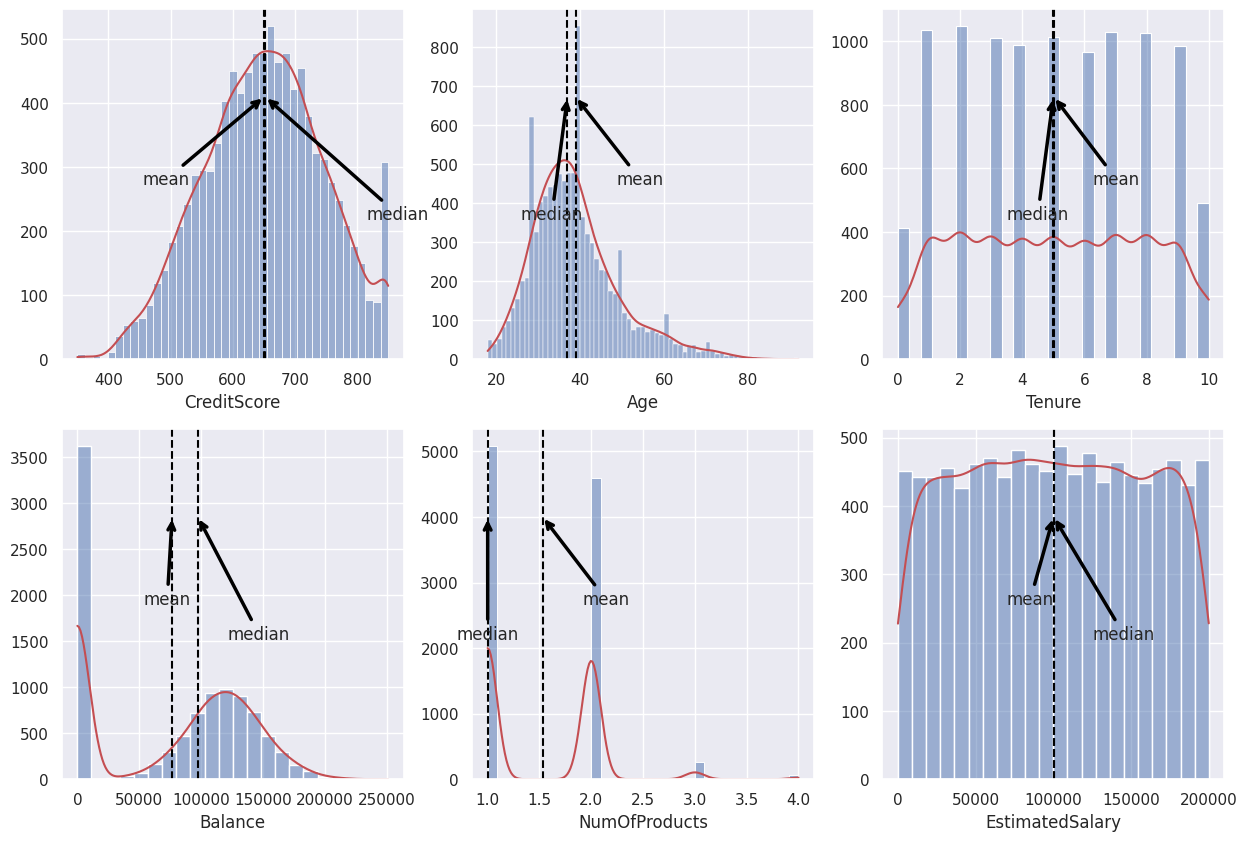

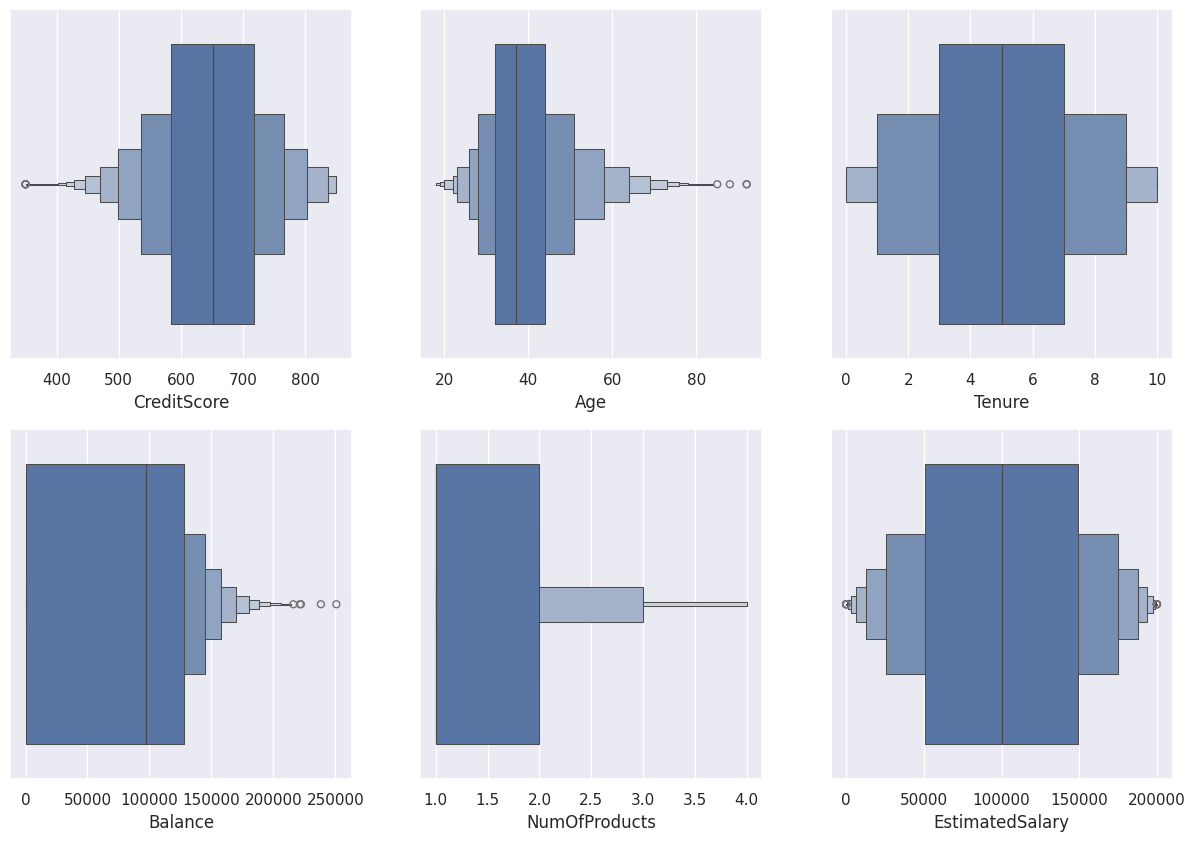

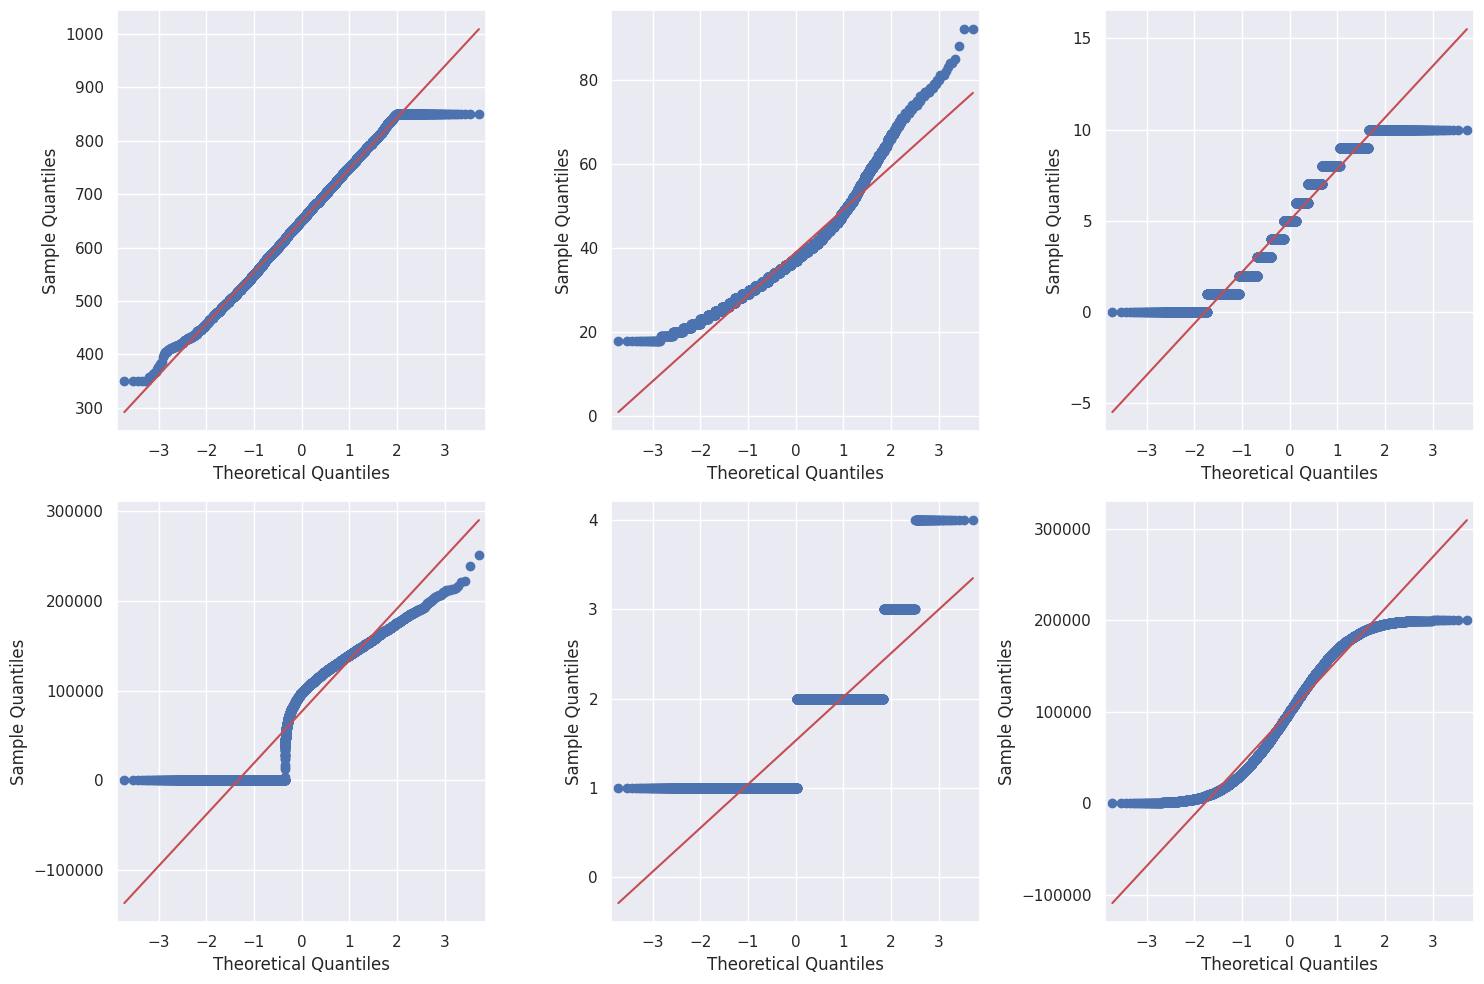

In [99]:
# hist + boxen + qq
##
figs, axes = dict(), dict()
graphs = ['hist', 'boxen', 'qq']
for graph in graphs:
    figs[graph], axes[graph] = plt.subplots(2, 3, sharex=False, sharey=False, 
                                            figsize=(15, 10))
##
names = np.array(num_cols).reshape(2, 3)
##
for i in range(2):
    for j in range(3):
        plot_hist(axes['hist'][i, j], names[i, j])
        plot_boxen(axes['boxen'][i, j], names[i, j])
        plot_qq(axes['qq'][i, j], names[i, j])

for name, fig in figs.items():
    fig.savefig(f'../resource/jupyter/image/eda_{name}.png')

plt.tight_layout()
plt.show()

In [98]:
figs.items()

dict_items([('hist', <Figure size 1500x1000 with 6 Axes>), ('boxen', <Figure size 1500x1000 with 6 Axes>), ('qq', <Figure size 1500x1000 with 6 Axes>)])